In [2]:
import pandas as pd
import numpy as np
from faker import Faker
import random, string
from datetime import datetime, timedelta,date

In [4]:
data= pd.read_csv('vehicle_data.csv')

In [6]:
data

,Unnamed: 0,id,range,Battery Level (%),Latitude (°),Longitude (°),speed,Maintenance Cost ($),Charging Cost ($),Pin Code,...,BC,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats,km
0,0,5,220.4175,67,29.883008,72.942581,87,226,11,622700,...,78.0,4607,1800,1479,2735,2490,496,405,5,128021.0
1,1,5,220.4175,67,29.883008,72.942581,87,226,11,622700,...,78.0,4607,1800,1479,2735,2490,496,405,5,127769.0
2,2,4,260.4360,53,28.556114,85.657276,60,247,24,636304,...,82.0,4261,1809,1568,2771,2300,447,385,5,98347.0
3,3,4,260.4360,53,28.556114,85.657276,60,247,24,636304,...,82.0,4261,1809,1568,2771,2300,447,385,5,103405.0
4,4,2,259.2300,77,35.194338,76.871280,82,268,21,894441,...,82.0,4694,1849,1443,2875,2232,388,561,5,156707.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,4,221.0250,67,27.527149,70.315534,72,98,35,120538,...,82.0,4261,1809,1568,2771,2300,447,385,5,133105.0
1996,1996,2,226.1400,71,10.341101,87.712294,113,298,10,536223,...,82.0,4694,1849,1443,2875,2232,388,561,5,134481.0
1997,1997,2,226.1400,71,10.341101,87.712294,113,298,10,536223,...,82.0,4694,1849,1443,2875,2232,388,561,5,132935.0
1998,1998,1,183.0600,58,13.488505,95.334931,67,178,18,293325,...,82.0,4694,1849,1443,2875,2232,388,561,5,110882.0


In [8]:
data1 = data.drop(['km','Unnamed: 0','Maintenance Cost ($)','Charging Cost ($)','id','status','Date','dvr','mgr','Seats','Latitude (°)','Longitude (°)','Pin Code','speed','Working Condition', 'Charging Status','Energy Consumed (kWh)','Fast Charge Speed (kW)'],axis=1)

In [10]:
list(data1)

['range',
 'Battery Level (%)',
 'Make',
 'Acceleration 0 - 100 km/h',
 'Top Speed',
 'ER',
 'Total Power',
 'Total Torque',
 'Drive',
 'BC',
 'Length',
 'Width',
 'Height',
 'Wheelbase',
 'Gross Vehicle Weight (GVWR)',
 'Max. Payload',
 'Cargo Volume']

In [12]:
len(list(data1))

17

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   range                        2000 non-null   float64
 1   Battery Level (%)            2000 non-null   int64  
 2   Make                         2000 non-null   object 
 3   Acceleration 0 - 100 km/h    2000 non-null   float64
 4   Top Speed                    2000 non-null   int64  
 5   ER                           2000 non-null   int64  
 6   Total Power                  2000 non-null   int64  
 7   Total Torque                 2000 non-null   int64  
 8   Drive                        2000 non-null   object 
 9   BC                           2000 non-null   float64
 10  Length                       2000 non-null   int64  
 11  Width                        2000 non-null   int64  
 12  Height                       2000 non-null   int64  
 13  Wheelbase         

In [16]:
data2 = pd.get_dummies(data1,dtype=int)

In [18]:
data2.shape

(2000, 23)

In [20]:
data1.shape

(2000, 17)

In [22]:
data2.head(5)

,range,Battery Level (%),Acceleration 0 - 100 km/h,Top Speed,ER,Total Power,Total Torque,BC,Length,Width,...,Max. Payload,Cargo Volume,Make_BMW,Make_Polestar,Make_Tesla1,Make_Tesla2,Make_Volkswagen,Drive_AWD,Drive_Front,Drive_Rear
0,220.4175,67,7.4,160,425,170,330,78.0,4607,1800,...,496,405,0,1,0,0,0,0,1,0
1,220.4175,67,7.4,160,425,170,330,78.0,4607,1800,...,496,405,0,1,0,0,0,0,1,0
2,260.4360,53,7.9,160,450,150,310,82.0,4261,1809,...,447,385,0,0,0,0,1,0,0,1
3,260.4360,53,7.9,160,450,150,310,82.0,4261,1809,...,447,385,0,0,0,0,1,0,0,1
4,259.2300,77,3.3,261,460,377,660,82.0,4694,1849,...,388,561,0,0,0,1,0,1,0,0


In [24]:
y=data2['range']

In [26]:
x = data2.drop('range',axis=1)

In [28]:
x

,Battery Level (%),Acceleration 0 - 100 km/h,Top Speed,ER,Total Power,Total Torque,BC,Length,Width,Height,...,Max. Payload,Cargo Volume,Make_BMW,Make_Polestar,Make_Tesla1,Make_Tesla2,Make_Volkswagen,Drive_AWD,Drive_Front,Drive_Rear
0,67,7.4,160,425,170,330,78.0,4607,1800,1479,...,496,405,0,1,0,0,0,0,1,0
1,67,7.4,160,425,170,330,78.0,4607,1800,1479,...,496,405,0,1,0,0,0,0,1,0
2,53,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1
3,53,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1
4,77,3.3,261,460,377,660,82.0,4694,1849,1443,...,388,561,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,67,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1
1996,71,3.3,261,460,377,660,82.0,4694,1849,1443,...,388,561,0,0,0,1,0,1,0,0
1997,71,3.3,261,460,377,660,82.0,4694,1849,1443,...,388,561,0,0,0,1,0,1,0,0
1998,58,4.4,233,485,366,493,82.0,4694,1849,1443,...,388,561,0,0,1,0,0,1,0,0


In [30]:
y

0       220.4175
1       220.4175
2       260.4360
3       260.4360
4       259.2300
          ...   
1995    221.0250
1996    226.1400
1997    226.1400
1998    183.0600
1999    183.0600
Name: range, Length: 2000, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [34]:
X_train.head(5)

,Battery Level (%),Acceleration 0 - 100 km/h,Top Speed,ER,Total Power,Total Torque,BC,Length,Width,Height,...,Max. Payload,Cargo Volume,Make_BMW,Make_Polestar,Make_Tesla1,Make_Tesla2,Make_Volkswagen,Drive_AWD,Drive_Front,Drive_Rear
968,66,7.4,160,425,170,330,78.0,4607,1800,1479,...,496,405,0,1,0,0,0,0,1,0
240,96,4.4,233,485,366,493,82.0,4694,1849,1443,...,388,561,0,0,1,0,0,1,0,0
819,17,3.3,261,460,377,660,82.0,4694,1849,1443,...,388,561,0,0,0,1,0,1,0,0
692,59,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1
420,62,3.3,261,460,377,660,82.0,4694,1849,1443,...,388,561,0,0,0,1,0,1,0,0


In [36]:
X_test.head(5)

,Battery Level (%),Acceleration 0 - 100 km/h,Top Speed,ER,Total Power,Total Torque,BC,Length,Width,Height,...,Max. Payload,Cargo Volume,Make_BMW,Make_Polestar,Make_Tesla1,Make_Tesla2,Make_Volkswagen,Drive_AWD,Drive_Front,Drive_Rear
1860,63,7.4,160,425,170,330,78.0,4607,1800,1479,...,496,405,0,1,0,0,0,0,1,0
353,91,4.4,233,485,366,493,82.0,4694,1849,1443,...,388,561,0,0,1,0,0,1,0,0
1333,49,3.3,261,460,377,660,82.0,4694,1849,1443,...,388,561,0,0,0,1,0,1,0,0
905,61,3.3,261,460,377,660,82.0,4694,1849,1443,...,388,561,0,0,0,1,0,1,0,0
1289,44,7.9,160,450,150,310,82.0,4261,1809,1568,...,447,385,0,0,0,0,1,0,0,1


In [38]:
### Linear Prediction Model

In [40]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression()
Model.fit(X_train,y_train)

LinearRegression()

In [42]:
y_pred = Model.predict(X_test)

In [44]:
y_pred

array([223.9375, 312.75  , 178.75  , 216.5   , 162.    , 227.125 ,
       220.75  , 242.8125, 195.625 , 221.75  , 232.25  , 337.25  ,
       304.625 , 158.875 , 265.5   , 265.5   , 293.875 , 275.25  ,
       229.125 , 322.25  , 286.875 , 102.25  , 259.5   , 145.25  ,
       315.875 , 142.125 , 241.625 ,  89.375 , 312.75  , 109.5   ,
       309.625 , 325.375 , 317.125 , 200.75  , 290.    , 112.625 ,
       312.75  , 104.375 , 190.375 ,  83.125 , 229.125 , 176.6875,
       213.375 , 158.875 , 151.625 ,  70.75  , 299.5   ,  82.375 ,
       239.625 , 312.75  , 309.875 , 288.875 , 277.5   , 113.875 ,
       180.875 , 262.75  , 155.75  , 131.5   , 124.25  ,  98.0625,
       277.5   , 214.4375,  99.125 , 303.375 , 284.5   , 167.375 ,
       332.875 , 168.    , 308.875 ,  73.875 , 241.625 ,  85.4375,
       288.875 , 215.25  , 208.1875, 269.    , 234.375 , 187.125 ,
       175.625 , 330.9375, 154.75  , 282.625 ,  92.5   , 243.5   ,
       271.875 , 119.    , 340.3125, 304.625 , 117.75  , 229.1

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8933744064390715

In [48]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape_value = mape(y_test,y_pred)
mape_value

0.20241773982793262

In [50]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

813.102340805625

In [52]:
Results= pd.DataFrame(columns=['Actual', 'Predicted']) 
Results['Actual']=y_test
Results ['Predicted']=y_pred 
#Results[km]x test['km'] 
Results=Results.reset_index() 
Results['id']=Results.index 
Results.head(15)

,index,Actual,Predicted,id
0,1860,201.9675,223.9375,0
1,353,314.2800,312.7500,1
2,1333,229.0560,178.7500,2
3,905,200.8800,216.5000,3
4,1289,211.9440,162.0000,4
5,1273,209.1150,227.1250,5
6,938,192.2100,220.7500,6
7,1731,228.8850,242.8125,7
8,65,172.2975,195.6250,8
9,1323,208.1175,221.7500,9


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

[]

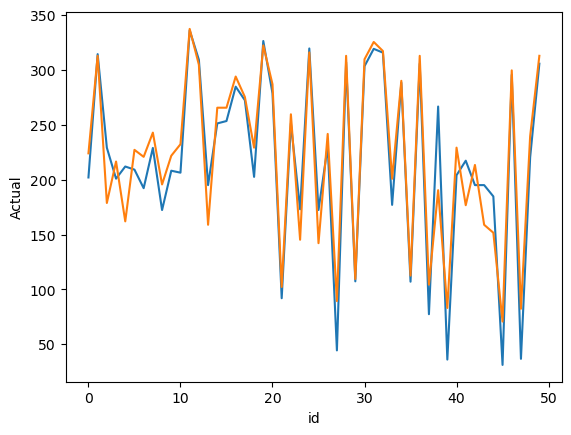

In [55]:
sns.lineplot(x='id',y='Actual',data = Results.head(50))
sns.lineplot(x='id',y='Predicted',data = Results.head(50))

plt.plot()

In [58]:
import pickle
pickle.dump(Model,open('test','wb'))

In [60]:
model = pickle.load(open('test','rb'))

In [62]:
r1 = [[15,5.7,190,470,250,430,83.9,4783,1852,1448,2856,2605,555,470,1,0,0,0,0,0,0,1]]
hh = model.predict(r1)
hh[0]

C:\Users\home\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72.875

In [64]:
Tesla1 = [20,4.4,233,485,366,493,82,4694,1849,1443,2875,2232,388,561,0,0,1,0,0,1,0,0]
Tesla1_1 = [50,4.4,233,485,366,493,82,4694,1849,1443,2875,2232,388,561,0,0,1,0,0,1,0,0]
Tesla2 = [35,3.3,261,460,377,660,82,4694,1849,1443,2875,2232,388,561,0,0,0,1,0,1,0,0]
BMW = [45,5.7,190,470,250,430,83.9,4783,1852,1448,2856,2605,555,470,1,0,0,0,0,0,0,1]
Volkswagen = [60,7.9,160,450,150,310,82,4261,1809,1568,2771,2300,447,385,0,0,0,0,1,0,0,1]
Polestar = [70,7.4,160,425,170,330,78,4607,1800,1479,2735,2490,496,405,0,1,0,0,0,0,1,0]

In [66]:
# Tesla1 = [20,4.4,233,485,366,493,82,4694,1849,1443,2875,2232,388,561,350000,0,0,1,0,0,1,0,0]
# Tesla2 = [35,3.3,261,460,377,660,82,4694,1849,1443,2875,2232,388,561,100000,0,0,0,1,0,1,0,0]
# BMW = [45,5.7,190,470,250,430,83.9,4783,1852,1448,2856,2605,555,470,600000,1,0,0,0,0,0,0,1]
# Volkswagen = [60,7.9,160,450,150,310,82,4261,1809,1568,2771,2300,447,385,25000,0,0,0,0,1,0,0,1]
# Polestar = [70,7.4,160,425,170,330,78,4607,1800,1479,2735,2490,496,405,150000,0,1,0,0,0,0,1,0]

In [68]:
battery_levels = [15,20,25,35,45,50,60,75,85]
vehicles = [Tesla1,Tesla2,BMW,Volkswagen,Polestar]
b=0
for vehicle in vehicles:
    if b==0:
        print("Tesla1")
    elif b==1:
        print("Tesla2")
    elif b==2:
        print("BMW")
    elif b==3:
        print("Volkswagan")
    else:
        print("Polestar")
    for bvalue in battery_levels:
        vehicle[0]=bvalue
        
        print("BL:" + str(bvalue) + " range: " + str(model.predict([vehicle])[0]))
    b+=1

Tesla1
BL:15 range: 73.75
BL:20 range: 89.5
BL:25 range: 105.1875
BL:35 range: 136.6875
BL:45 range: 168.125
BL:50 range: 183.875
BL:60 range: 215.3125
BL:75 range: 262.5
BL:85 range: 294.0
Tesla2
BL:15 range: 71.9375
BL:20 range: 87.6875
BL:25 range: 103.375
BL:35 range: 134.8125
BL:45 range: 166.3125
BL:50 range: 182.0625
BL:60 range: 213.5
BL:75 range: 260.6875
BL:85 range: 292.1875
BMW
BL:15 range: 72.875
BL:20 range: 88.5625
BL:25 range: 104.3125
BL:35 range: 135.8125
BL:45 range: 167.25
BL:50 range: 183.0
BL:60 range: 214.4375
BL:75 range: 261.625
BL:85 range: 293.0625
Volkswagan
BL:15 range: 70.8125
BL:20 range: 86.5625
BL:25 range: 102.25
BL:35 range: 133.6875
BL:45 range: 165.1875
BL:50 range: 180.9375
BL:60 range: 212.375
BL:75 range: 259.5625
BL:85 range: 291.0625
Polestar
BL:15 range: 72.8125
BL:20 range: 88.5625
BL:25 range: 104.3125
BL:35 range: 135.75
BL:45 range: 167.1875
BL:50 range: 182.9375
BL:60 range: 214.4375
BL:75 range: 261.5625
BL:85 range: 293.0625


C:\Users\home\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\home\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\home\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\home\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\home\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\home\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have val

In [70]:
from sklearn.linear_model import Ridge 
# training model with 0.5 alpha value 
ridge_model = Ridge(alpha = 0.5, tol = 0.001,solver ='auto', random_state = 42) 
ridge_model.fit(X_train, y_train) 

# predicting the y_test 
ridge_y_pred = ridge_model.predict(X_test) 
  
# finding score for our model 
score = ridge_model.score(X_test, ridge_y_pred ) 
# print("\n\nRidge Model score : ", score) 

In [72]:
from sklearn.metrics import r2_score
r2_score(y_test,ridge_y_pred)

0.8933242191360499

In [74]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,ridge_y_pred)
mse

813.4850576769011

In [76]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape_value = mape(y_test,ridge_y_pred)
mape_value

0.20277712223707398

In [78]:
Ridge_Results= pd.DataFrame(columns=['Actual', 'Predicted']) 
Ridge_Results['Actual']=y_test
Ridge_Results['Predicted']=ridge_y_pred
#Results[km]x test['km'] 
Ridge_Results=Ridge_Results.reset_index() 
Ridge_Results['id']=Ridge_Results.index 
Ridge_Results.head(15)

,index,Actual,Predicted,id
0,1860,201.9675,223.909392,0
1,353,314.2800,312.880795,1
2,1333,229.0560,178.922542,2
3,905,200.8800,216.675613,3
4,1289,211.9440,162.059626,4
5,1273,209.1150,227.151505,5
6,938,192.2100,220.859326,6
7,1731,228.8850,242.785927,7
8,65,172.2975,195.690612,8
9,1323,208.1175,221.835322,9


In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

[]

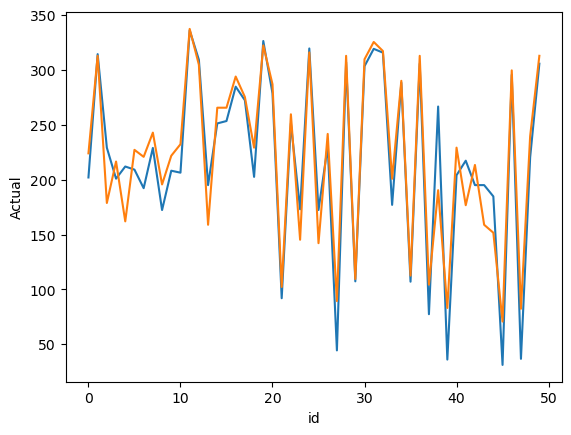

In [82]:
sns.lineplot(x='id',y='Actual',data = Results.head(50))
sns.lineplot(x='id',y='Predicted',data = Results.head(50))

plt.plot()

In [84]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.7)

# Fit the model to the training data
elastic_net.fit(X_train, y_train)


# Make predictions on the test data
elastic_net_y_pred = elastic_net.predict(X_test)


# Print the coefficients of the trained model
# print('Elastic Net coefficients:')
# print(elastic_net.coef_)

In [86]:
from sklearn.metrics import r2_score
r2_score(y_test,elastic_net_y_pred)

0.8933105217901013

In [88]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,elastic_net_y_pred)
mse

813.5895104980457

In [90]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape_value = mape(y_test,elastic_net_y_pred)
mape_value

0.20288847428151527

In [92]:
Elastic_Net_Results= pd.DataFrame(columns=['Actual', 'Predicted']) 
Elastic_Net_Results['Actual']=y_test
Elastic_Net_Results['Predicted']=elastic_net_y_pred
#Results[km]x test['km'] 
Elastic_Net_Results=Elastic_Net_Results.reset_index() 
Elastic_Net_Results['id']=Elastic_Net_Results.index 
Elastic_Net_Results.head(15)

,index,Actual,Predicted,id
0,1860,201.9675,223.908536,0
1,353,314.2800,312.804801,1
2,1333,229.0560,178.954193,2
3,905,200.8800,216.691250,3
4,1289,211.9440,162.081461,4
5,1273,209.1150,227.144462,5
6,938,192.2100,220.854952,6
7,1731,228.8850,242.777064,7
8,65,172.2975,195.696914,8
9,1323,208.1175,221.831801,9


[]

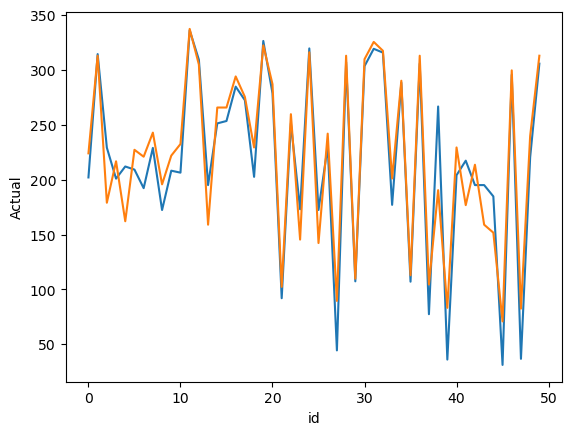

In [94]:
sns.lineplot(x='id',y='Actual',data = Elastic_Net_Results.head(50))
sns.lineplot(x='id',y='Predicted',data = Elastic_Net_Results.head(50))

plt.plot()

In [96]:
Results + Ridge_Results + Elastic_Net_Results

,index,Actual,Predicted,id
0,5580,605.9025,671.755428,0
1,1059,942.8400,938.435595,3
2,3999,687.1680,536.626735,6
3,2715,602.6400,649.866863,9
4,3867,635.8320,486.141086,12
...,...,...,...,...
395,2895,133.4160,268.410671,1185
396,3852,699.5160,514.513618,1188
397,5217,136.0800,268.410671,1191
398,783,607.8960,470.590827,1194


In [98]:
final_results=pd.DataFrame()
final_results['Actual'] = y_test
final_results['Linear_pred'] = y_pred
final_results['Ridge_pred'] = ridge_y_pred
final_results['ElasticNet_Pred'] = elastic_net_y_pred
final_results=final_results.reset_index() 
final_results['id']=final_results.index 
final_results.head(20)

,index,Actual,Linear_pred,Ridge_pred,ElasticNet_Pred,id
0,1860,201.9675,223.9375,223.909392,223.908536,0
1,353,314.2800,312.7500,312.880795,312.804801,1
2,1333,229.0560,178.7500,178.922542,178.954193,2
3,905,200.8800,216.5000,216.675613,216.691250,3
4,1289,211.9440,162.0000,162.059626,162.081461,4
5,1273,209.1150,227.1250,227.151505,227.144462,5
6,938,192.2100,220.7500,220.859326,220.854952,6
7,1731,228.8850,242.8125,242.785927,242.777064,7
8,65,172.2975,195.6250,195.690612,195.696914,8
9,1323,208.1175,221.7500,221.835322,221.831801,9
